In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [2]:
data = pd.read_json("PreProcessData.json")
data.head()

,text,toxic
0,explanation edit make username hardcore metall...,0
1,aww match background colour seemingly stick th...,0
2,hey really try edit guy constantly remove rele...,0
3,make real suggestion improvement wonder sectio...,0
4,sir hero chance remember page,0


In [3]:
# Conhecendo mais o banco de dados

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


AxesSubplot(0.125,0.125;0.775x0.755) <seaborn.axisgrid.PairGrid object at 0x7f1e50fc06d0>


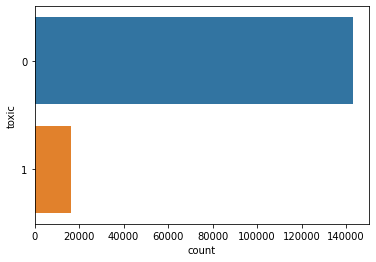

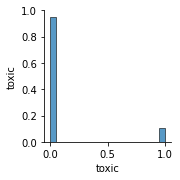

In [4]:
# Análise do nivel de toxicidade

# Importante ser obervado que grande parte dos dados são '0s', 
# logo, nosso modelo terá um quantitativo de acertividade muito 
# grande, visto que os dados não são tão equivalentes.


data.toxic.value_counts()
grafico1 = sns.countplot(y="toxic", data=data)
grafico2 = sns.pairplot(data)

print(grafico1, grafico2)

In [5]:
# Vetorização -> processo de "nomear" as palavras com números

tfidf = TfidfVectorizer(max_features=None)

X = tfidf.fit_transform(data.text)
Y = data.toxic.to_numpy()

In [6]:
rng = np.random.RandomState(seed=1)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.6, random_state=rng)

In [7]:
# Random Forest

randomForest = {
    'acuracia_RF': list(),
    'matrizDeConfusao_RF': list(),
    'rocAUC_RF': list()
}

for i in tqdm(range(5)):

    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.6)

    clf_RF = RandomForestClassifier()
    clf_RF.fit(xTrain, yTrain)

    yHat = clf_RF.predict(xTest)

    randomForest['acuracia_RF'].append(accuracy_score(yTest, yHat))
    randomForest['matrizDeConfusao_RF'].append(confusion_matrix(yTest, yHat))
    randomForest['rocAUC_RF'].append(roc_auc_score(yTest, yHat))

100%|██████████| 5/5 [46:39<00:00, 559.84s/it]


In [8]:
# Regressão logística

regressaoLogistica = {
    'acuracia_RL': list(),
    'matrizDeConfusao_RL': list(),
    'rocAUC_RL': list()
}

for i in tqdm(range(5)):
    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.6)

    clf_RL = LogisticRegression()
    clf_RL.fit(xTrain, yTrain)

    yHat = clf_RL.predict(xTest)

    regressaoLogistica['acuracia_RL'].append(accuracy_score(yTest, yHat))
    regressaoLogistica['matrizDeConfusao_RL'].append(confusion_matrix(yTest, yHat))
    regressaoLogistica['rocAUC_RL'].append(roc_auc_score(yTest, yHat))

100%|██████████| 5/5 [00:24<00:00,  4.88s/it]


In [9]:
# Media - Regressão Logística (RL)
mediaAcuracia_RL = np.mean(regressaoLogistica['acuracia_RL'])
mediaMatrizConf_RL = np.mean(regressaoLogistica['matrizDeConfusao_RL'], axis=0)
mediaRocAUC_RL = np.mean(regressaoLogistica['rocAUC_RL'])
# Desvio Padrão - Regressão Logística (RL)
dpAcuracia_RL = np.std(regressaoLogistica['acuracia_RL'])
dpMatrizConf_RL = np.std(regressaoLogistica['matrizDeConfusao_RL'], axis=0)
dpRocAUC_RL = np.std(regressaoLogistica['rocAUC_RL'])

# Media - Random Forest (RF)
mediaAcuracia_RF = np.mean(randomForest['acuracia_RF'])
mediaMatrizConf_RF = np.mean(randomForest['matrizDeConfusao_RF'], axis=0)
mediaRocAUC_RF = np.mean(randomForest['rocAUC_RF'])
# Desvio Padrão - Random Forest (RF)
dpAcuracia_RF = np.std(randomForest['acuracia_RF'])
dpMatrizConf_RF = np.std(randomForest['matrizDeConfusao_RF'], axis=0)
dpRocAUC_RF = np.std(randomForest['rocAUC_RF'])

In [14]:
dataResult = {
    'Media - Acuracia (RL)': mediaAcuracia_RL,
    'Media - Matriz de Confusão (RL)': mediaMatrizConf_RL,
    'Media - RocAUC (RL)': mediaRocAUC_RL,
    'Desvio Padrão - Acuracia (RL)': dpAcuracia_RL,
    'Desvio Padrão - Matriz de Confusão (RL)': dpMatrizConf_RL,
    'Desvio Padrão - RocAUC (RL)': dpRocAUC_RL,

    'Media - Acuracia (RF)': mediaAcuracia_RF,
    'Media - Matriz de Confusão (RF)': mediaMatrizConf_RF,
    'Media - RocAUC (RF)': mediaRocAUC_RF,
    'Desvio Padrão - Acuracia (RF)': dpAcuracia_RF,
    'Desvio Padrão - Matriz de Confusão (RF)': dpMatrizConf_RF,
    'Desvio Padrão - RocAUC (RF)': dpRocAUC_RF
}

In [15]:
print("###### MEDIA ######")
print("Media - Acuracia (RL):", dataResult['Media - Acuracia (RL)'])
print("Media - Matriz de Confusão (RL):", dataResult['Media - Matriz de Confusão (RL)'])
print("Media - RocAUC (RL):", dataResult['Media - RocAUC (RL)'])
print("                                                    ")
print("###### DESVIO PADRÃO ######")
print("Desvio Padrão - Acuracia (RL):", dataResult['Desvio Padrão - Acuracia (RL)'])
print("Desvio Padrão  - Matriz de Confusão (RL):", dataResult['Desvio Padrão - Matriz de Confusão (RL)'])
print("Desvio Padrão  - RocAUC (RL):", dataResult['Desvio Padrão - RocAUC (RL)'])


print("                                                    ")
print("                                                    ")


print("###### MEDIA ######")
print("Media - Acuracia (RF):", dataResult['Media - Acuracia (RF)'])
print("Media - Matriz de Confusão (RF):", dataResult['Media - Matriz de Confusão (RF)'])
print("Media - RocAUC (RF):", dataResult['Media - RocAUC (RF)'])
print("                                                    ")
print("###### DESVIO PADRÃO ######")
print("Desvio Padrão - Acuracia (RF):", dataResult['Desvio Padrão - Acuracia (RF)'])
print("Desvio Padrão  - Matriz de Confusão (RF):", dataResult['Desvio Padrão - Matriz de Confusão (RF)'])
print("Desvio Padrão  - RocAUC (RF):", dataResult['Desvio Padrão - RocAUC (RF)'])

###### MEDIA ######
Media - Acuracia (RL): 0.9506303332880733
Media - Matriz de Confusão (RL): [[85722.8   299. ]
 [ 4427.8  5293.4]]
Media - RocAUC (RL): 0.7705230217457231
                                                    
###### DESVIO PADRÃO ######
Desvio Padrão - Acuracia (RL): 0.0002491344790261689
Desvio Padrão  - Matriz de Confusão (RL): [[42.55537569 30.99677403]
 [28.02427519 27.20735195]]
Desvio Padrão  - RocAUC (RL): 0.0010548626015832222
                                                    
                                                    
###### MEDIA ######
Media - Acuracia (RF): 0.9486542097072371
Media - Matriz de Confusão (RF): [[85701.8   305.4]
 [ 4610.6  5125.2]]
Media - RocAUC (RF): 0.7614388106424712
                                                    
###### DESVIO PADRÃO ######
Desvio Padrão - Acuracia (RF): 0.0005957650857493185
Desvio Padrão  - Matriz de Confusão (RF): [[32.57852053 37.45183574]
 [61.9180103  61.94642847]]
Desvio Padrão  - RocAUC (RF): 0.

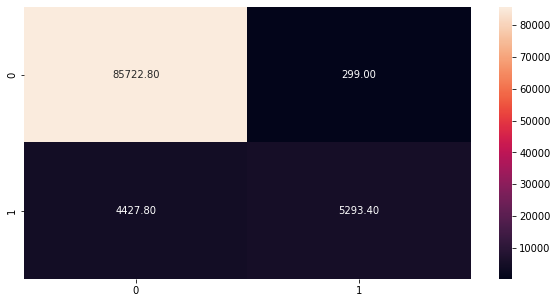

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(mediaMatrizConf_RL, annot=True, fmt='.2f')

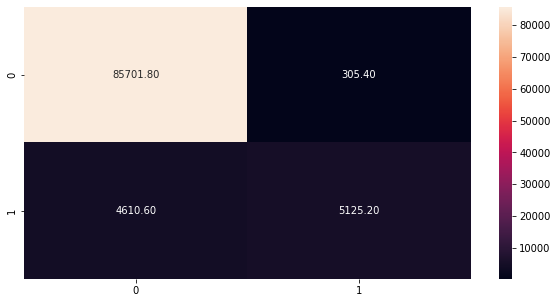

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(mediaMatrizConf_RF, annot=True, fmt='.2f')

"Prever o futuro pode ser impossível, todavia, as previsões pelo menos nos tornam cientes das possibilidades que talvez não levássemos em consideração."